# CREDIT RISK ANALYSIS

# Libraries
##### Import the necessary Libraries to be used in te analysis

In [1]:
# Import necessary libraries

# Data manipulation and analysis
import pandas as pd            # For handling tabular data and data manipulation
import numpy as np             # For numerical computations and array manipulation

# Data visualization
import matplotlib.pyplot as plt       # For creating static, interactive, and animated visualizations
import seaborn as sns                 # For statistical data visualization

# Model building and evaluation
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression     # For building logistic regression models
from sklearn.metrics import accuracy_score, classification_report   # For evaluating model performance metrics

# Machine learning algorithms
import xgboost as xgb                 # For building gradient boosting models (XGBoost)
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Data importation
##### Import the dataset into jupyter notebook environment

In [2]:
# Set the dataset directory and name it 'file_path'
file_path = r'C:\Users\USER\Desktop\banford\barry\credit_ risk_dataset\credit_risk_dataset.csv'

#Load the dataset using the pandas library
credit_risk_df = pd.read_csv(file_path)

# Understanding the data and data Manipulation
##### Learn about the dataset to get insight and perform further analysis

In [3]:
# Display the dataset
display(credit_risk_df)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
# Check the dataset dimension
df_dimension = credit_risk_df.shape
column = df_dimension[1]
row = df_dimension[0]
print(f"📊 The dataset dimensions are as follows:")
print(f"   - Number of columns: {column}")
print(f"   - Number of rows: {row}")
print(f"🎉 Let's dive into the data and uncover insights!")

📊 The dataset dimensions are as follows:
   - Number of columns: 12
   - Number of rows: 32581
🎉 Let's dive into the data and uncover insights!


In [5]:
# Print all the column names in the dataset (credit risk dataset)
column_names = credit_risk_df.columns
print("These are the column names in the credit risk dataset are as follows:")
for i, col in enumerate(column_names, 1):
    print(f"{i}. {col}")

These are the column names in the credit risk dataset are as follows:
1. person_age
2. person_income
3. person_home_ownership
4. person_emp_length
5. loan_intent
6. loan_grade
7. loan_amnt
8. loan_int_rate
9. loan_status
10. loan_percent_income
11. cb_person_default_on_file
12. cb_person_cred_hist_length


### column renaming
##### for easy computation, we rename some columns

In [6]:
# rename some column names for easy computation
credit_risk_df.rename(columns={'person_age': 'age',
                              'person_income': 'income',
                              'person_home_ownership': 'home',
                              'person_emp_length': 'emp_length',
                               'loan_amnt': 'loan_amount',
                              }, inplace=True)

###### The renamed columns are effective, then we check the column information

In [7]:
# Display basic information about the 'credit_risk_dataset'
print("Dataset Information:")
credit_risk_df.info() # Get information about the dataset

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         32581 non-null  int64  
 1   income                      32581 non-null  int64  
 2   home                        32581 non-null  object 
 3   emp_length                  31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amount                 32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
# Check for missing values in the dataset
missing_values = credit_risk_df.isnull().values.any()

# Check for missing values
print('The dataset values infomation as follows:')
print('________________________________________________')
print('column name               |     missing values')

print('``````````````````````````|```````````````````')
print(credit_risk_df.isnull().sum())
print('______________________________________________')

# Print the result
print("Is there a missing values in the dataset?:", missing_values)

The dataset values infomation as follows:
________________________________________________
column name               |     missing values
``````````````````````````|```````````````````
age                              0
income                           0
home                             0
emp_length                     895
loan_intent                      0
loan_grade                       0
loan_amount                      0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
______________________________________________
Is there a missing values in the dataset?: True


### Data Cleaning and Preprocessing
###### We need to handle the missing values from the dataset before we perform further analysis so as not to skew the analysis result

In [9]:
# Handle missing values
credit_risk_df.dropna(inplace=True) # this will remove the null values from the dataset

In [10]:
# Check for missing values again after droping the missing values
print('The dataset values infomation after droping the missing values as follows:')
print('________________________________________________')
print('column name               |     missing values')

print('``````````````````````````|```````````````````')
print(credit_risk_df.isnull().sum())

# Print the result
print("Is there a missing values in the dataset?:", missing_values)

The dataset values infomation after droping the missing values as follows:
________________________________________________
column name               |     missing values
``````````````````````````|```````````````````
age                           0
income                        0
home                          0
emp_length                    0
loan_intent                   0
loan_grade                    0
loan_amount                   0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
Is there a missing values in the dataset?: True


### Explore unique values in each columns
##### The dataset is clean by now and we can proceed to learn more about the dataset.
##### We explore the categorical columns to understand the unique values

In [11]:
# Explore unique values in categorical columns
categorical_columns = credit_risk_df.select_dtypes(include='object').columns
for column in categorical_columns:
 unique_values = credit_risk_df[column].unique()
 print(f" These are the unique values in {column}:\n", unique_values)

length = len(categorical_columns)
print('There are', length, 'categorical columns in the dataset')

 These are the unique values in home:
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
 These are the unique values in loan_intent:
 ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
 These are the unique values in loan_grade:
 ['D' 'B' 'C' 'A' 'E' 'F' 'G']
 These are the unique values in cb_person_default_on_file:
 ['Y' 'N']
There are 4 categorical columns in the dataset


###### let make another copy of the preprocess dataset for futher processing

In [12]:
# create a copy of the credit_risk_df and name is 'credit_risk_dt'
credit_risk_dt = credit_risk_df.copy()

###### We create a mapping for the 'cb_person_default_on_file_mapping' since it contains binary values and uses dummy data for the rest of the 3 columns. The reason why beacuse Machine learning model only works with numerical values.

In [13]:
# Define mapping dictionaries for the 'cb_person_default_on_file' since it's a binary value.
cb_person_default_on_file_mapping = {'N': 0, 'Y': 1} # we set N = 0 and Y = 1

# replace the values with the respective mapped value
credit_risk_dt['cb_person_default_on_file'] = credit_risk_dt['cb_person_default_on_file'].replace(cb_person_default_on_file_mapping)
credit_risk_dt

,age,income,home,emp_length,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


In [14]:
# Define a list of categorical columns for potential one-hot encoding
categorical_columns = ['home', 'loan_intent', 'loan_grade']
    
# Create dummy variables for the specified categorical columns
dummy_df = pd.get_dummies(credit_risk_dt,
                          columns=categorical_columns,
                          drop_first=True, dtype=int)

# Display information about the resulting DataFrame with dummy variables
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          28638 non-null  int64  
 1   income                       28638 non-null  int64  
 2   emp_length                   28638 non-null  float64
 3   loan_amount                  28638 non-null  int64  
 4   loan_int_rate                28638 non-null  float64
 5   loan_status                  28638 non-null  int64  
 6   loan_percent_income          28638 non-null  float64
 7   cb_person_default_on_file    28638 non-null  int64  
 8   cb_person_cred_hist_length   28638 non-null  int64  
 9   home_OTHER                   28638 non-null  int32  
 10  home_OWN                     28638 non-null  int32  
 11  home_RENT                    28638 non-null  int32  
 12  loan_intent_EDUCATION        28638 non-null  int32  
 13  loan_intent_HOMEIMPRO

In [15]:
# Check the dataset dimension
df_dimension = dummy_df.shape
column = df_dimension[1]
row = df_dimension[0]
print(f"📊 The dataset (dummy_df) dimensions after the preprocessing are as follows:")
print(f"   - Number of columns: {column}")
print(f"   - Number of rows: {row}")
print(f"🎉 Let's dive into the data and uncover insights!")

📊 The dataset (dummy_df) dimensions after the preprocessing are as follows:
   - Number of columns: 23
   - Number of rows: 28638
🎉 Let's dive into the data and uncover insights!


In [16]:
# Print out the column names of the DataFrame credit_risk_dt
print("Column names of the dummy_df:")
print(dummy_df.columns)

Column names of the dummy_df:
Index(['age', 'income', 'emp_length', 'loan_amount', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'home_OTHER', 'home_OWN', 'home_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G'],
      dtype='object')


# Exploration Data Analysis

# Plot a Histogram to understand data distribution

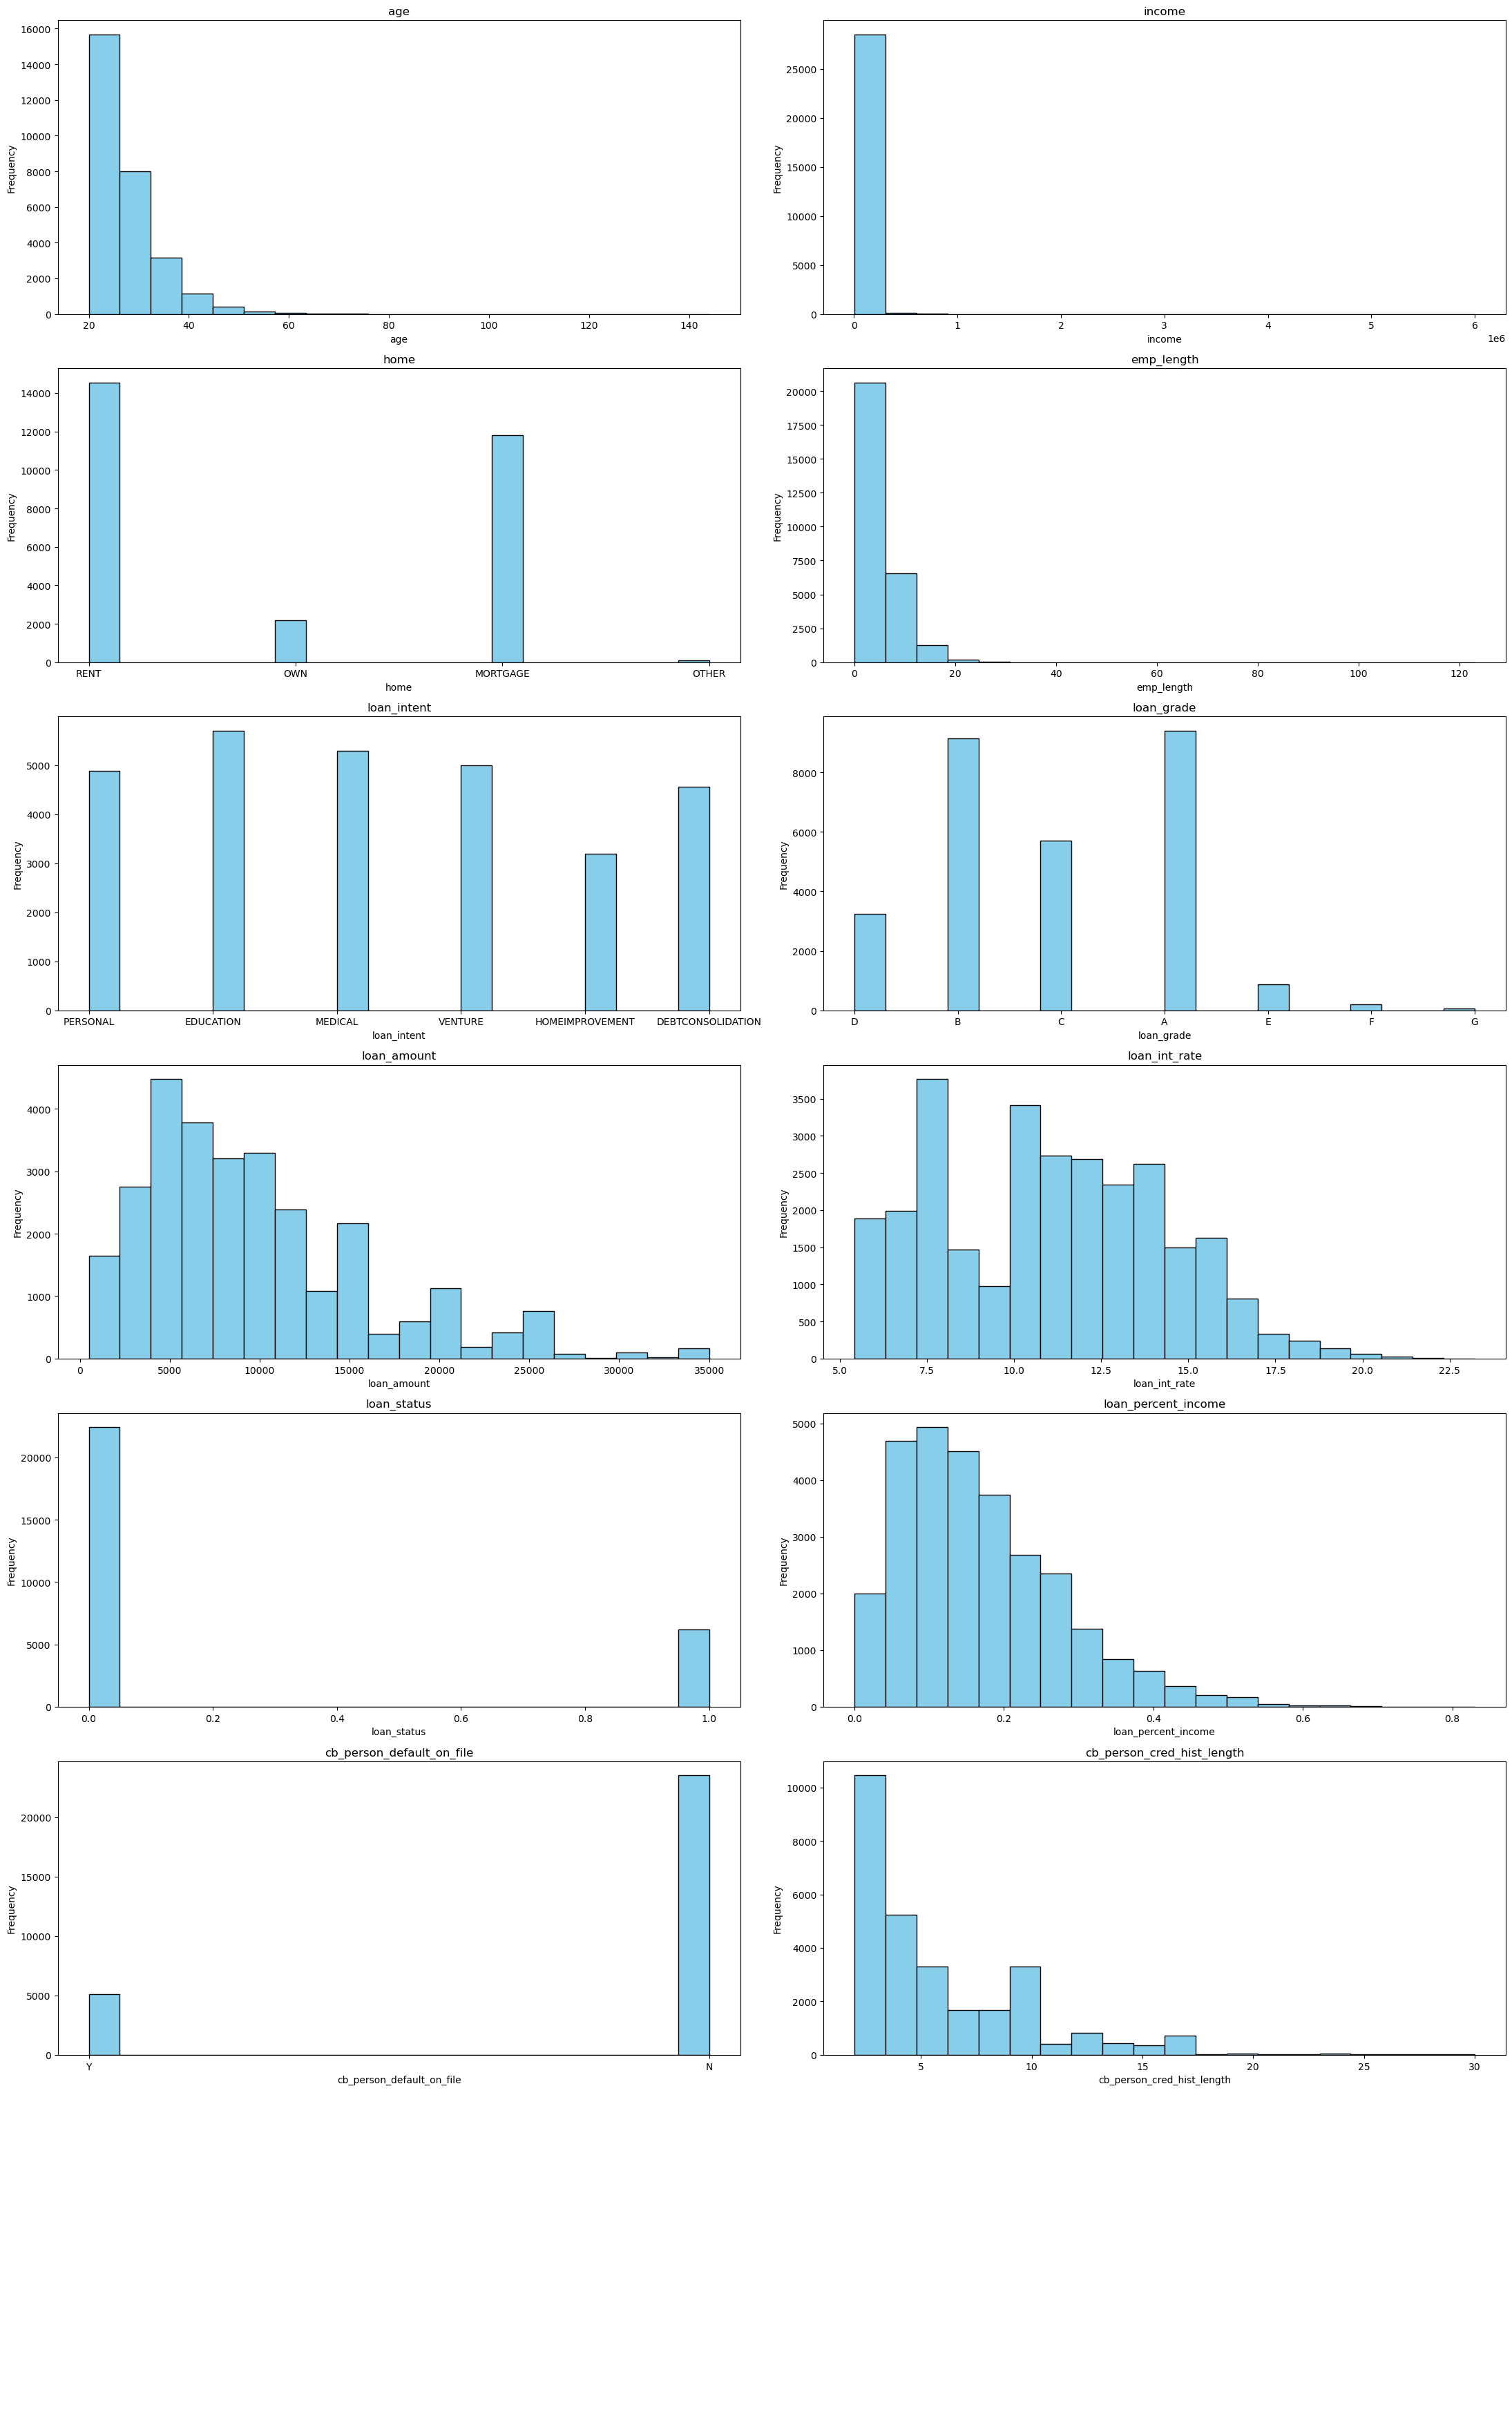

In [17]:
# Get column names
column_names = credit_risk_df.columns

# Determine number of rows and columns for subplots
num_cols = 2
num_plots = len(column_names)
num_rows = (num_plots - 1) // num_cols + 2

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(22, 5*num_rows))

# Plot histograms for each column
for i, col in enumerate(column_names):
    ax = axs[i // num_cols, i % num_cols]
    ax.hist(credit_risk_df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    axs[i // num_cols, i % num_cols].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


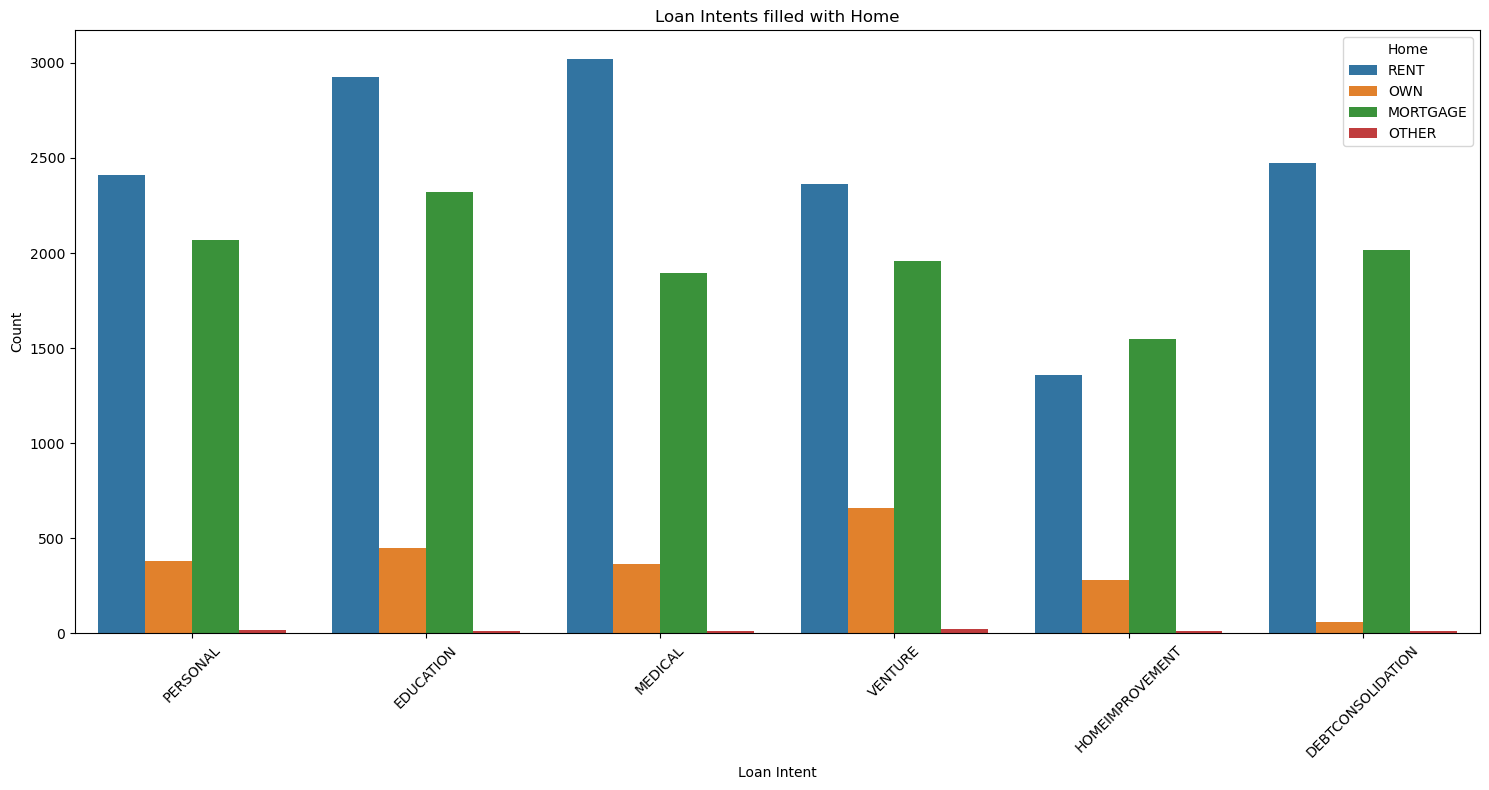

In [18]:
# Plotting the loan intents filled with home
plt.figure(figsize=(15, 8))
sns.countplot(x='loan_intent', hue='home', data=credit_risk_df)
plt.title('Loan Intents filled with Home')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Home')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart illustrates that individuals who own homes exhibit a greater inclination towards ventures compared to other loan intents. Additionally, it indicates that a significant portion of loan intents originate from individuals residing in rental apartments.

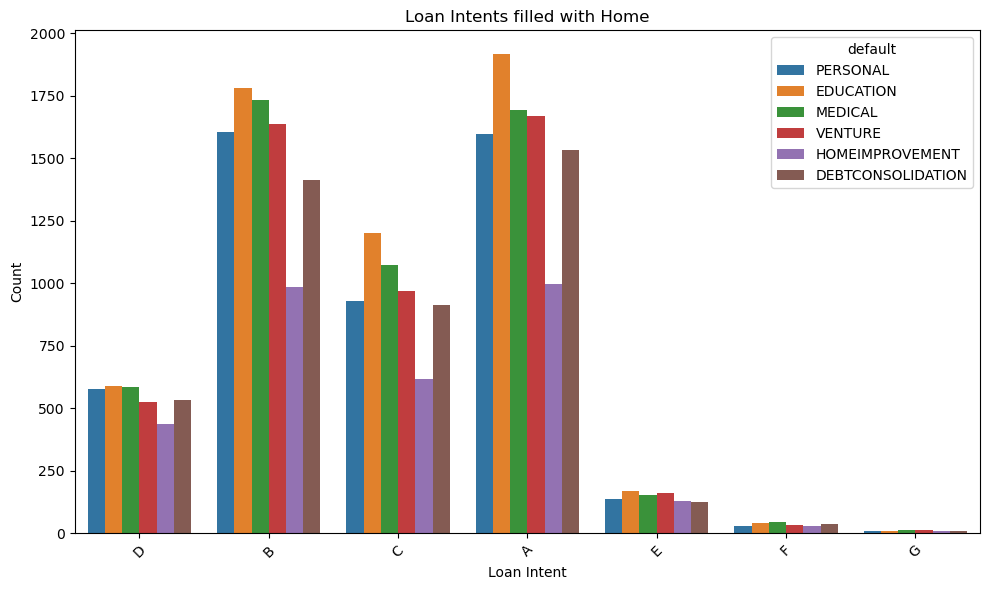

In [19]:
# Plotting the count of loan intents filled with home
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_grade', hue='loan_intent', data=credit_risk_df)
plt.title('Loan Intents filled with Home')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='default')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Calculate correlation coefficients between 'loan_int_rate' and numerical features
correlation_matrix = dummy_df.corr()
loan_int_rate_corr = correlation_matrix['loan_int_rate'].sort_values(ascending=False)

# Display correlation coefficients
print("Correlation coefficients with 'loan_int_rate':")
print(loan_int_rate_corr)

# Select the top two features with the highest absolute correlation coefficients
additional_features = loan_int_rate_corr[1:5].index.tolist()
print("\nRecommended additional features based on correlation result:", additional_features)


Correlation coefficients with 'loan_int_rate':
loan_int_rate                  1.000000
cb_person_default_on_file      0.500254
loan_grade_D                   0.477250
loan_grade_C                   0.372469
loan_status                    0.339350
loan_grade_E                   0.326998
loan_grade_F                   0.200658
loan_amount                    0.145904
home_RENT                      0.132972
loan_grade_G                   0.129607
loan_percent_income            0.123500
loan_intent_HOMEIMPROVEMENT    0.020416
home_OTHER                     0.017606
cb_person_cred_hist_length     0.015371
age                            0.011019
loan_intent_MEDICAL            0.005831
income                        -0.001381
loan_intent_PERSONAL          -0.002660
home_OWN                      -0.006777
loan_grade_B                  -0.007936
loan_intent_VENTURE           -0.008691
loan_intent_EDUCATION         -0.008847
emp_length                    -0.056405
Name: loan_int_rate, dtype: float

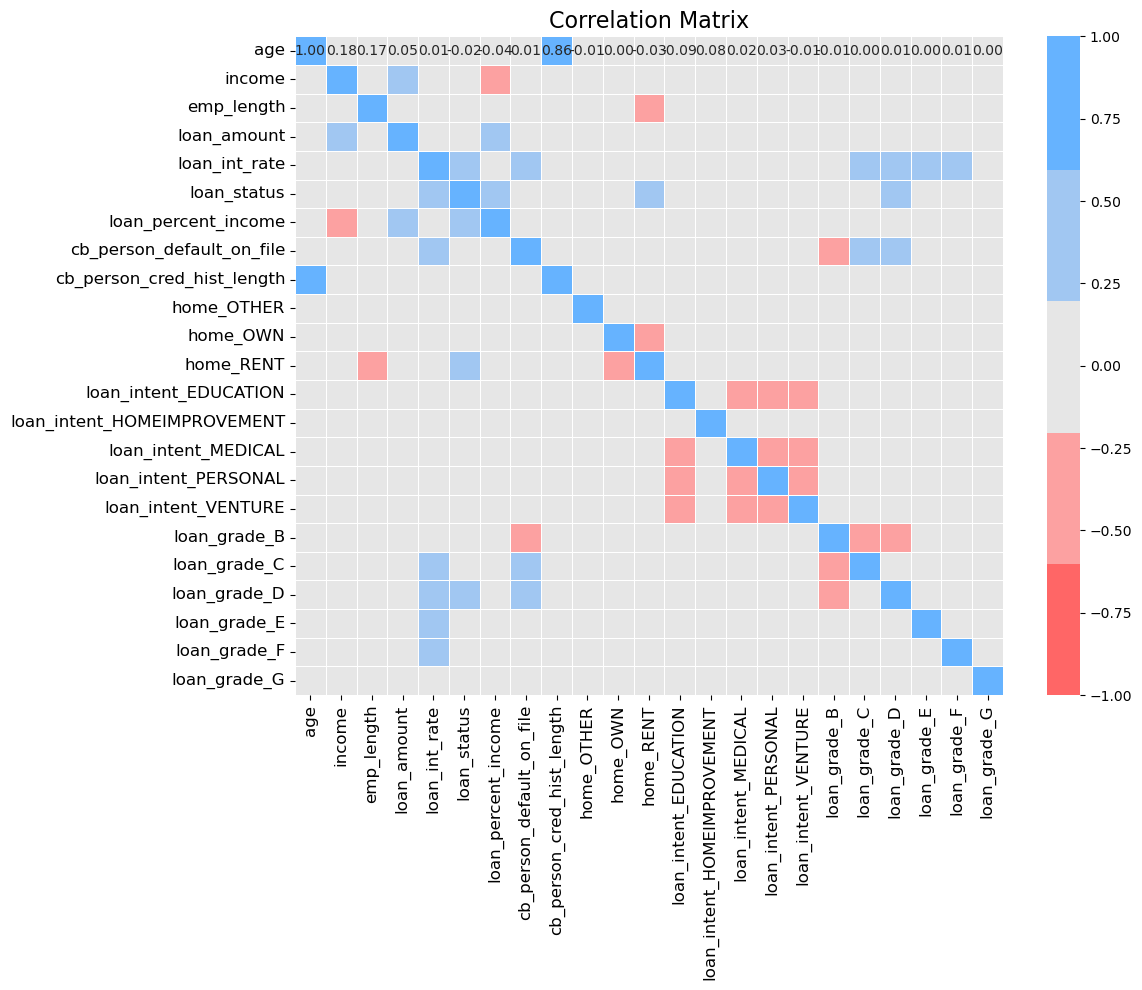

In [21]:
# Define custom color palette
colors = ["#ff6666", "#fca1a1", "#e6e6e6", "#a1c7f2", "#66b3ff"]

# Plot the heatmap with custom color palette
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=colors, vmin=-1, vmax=1, center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Result Summary: Correlation with 'loan_int_rate'

The correlation coefficients with 'loan_int_rate' are as follows:

- **Strong Positive Correlation (0.5 to 1.0):**
    - cb_person_default_on_file: 0.500
    - loan_grade_D: 0.477
    - loan_grade_C: 0.372
    - loan_status: 0.339
    - loan_grade_E: 0.327

- **Moderate Positive Correlation (0.3 to 0.5):**
    - loan_grade_F: 0.201

- **Weak Positive Correlation (0.1 to 0.3):**
    - loan_amount: 0.146
    - home_RENT: 0.133
    - loan_grade_G: 0.130
    - loan_percent_income: 0.124
    - loan_intent_HOMEIMPROVEMENT: 0.020

- **Weak Negative Correlation (-0.1 to 0):**
    - home_OTHER: 0.018
    - cb_person_cred_hist_length: 0.015
    - age: 0.011
    - loan_intent_MEDICAL: 0.006
    - income: -0.001
    - loan_intent_PERSONAL: -0.003

- **Strong Negative Correlation (-0.3 to -0.5):**
    - home_OWN: -0.007
    - loan_grade_B: -0.008
    - loan_intent_VENTURE: -0.009
    - loan_intent_EDUCATION: -0.009

- **Moderate Negative Correlation (-0.3 to -0.5):**
    - emp_length: -0.056

These correlation coefficients indicate the strength and direction of the relationship between the 'loan_int_rate' and other variables in the dataset. Positive values signify a positive correlation, where an increase in one variable is associated with an increase in 'loan_int_rate'. Negative values indicate a negative correlation, where an increase in one variable is associated with a decrease in 'loan_int_rate'.

# Machine Learning
###### We build a model to predict default

In [22]:
# Define features (including 'loan_int_rate' and selected additional features)
features = ['loan_int_rate', 'cb_person_default_on_file', 'loan_grade_D']  # Update with selected features

# Extract features and target variable
X = dummy_df[features]
y = dummy_df['loan_status']  # Assuming 'loan_status' is the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of training set (X_train):", X_train.shape)
print("Shape of testing set (X_test):", X_test.shape)

Shape of training set (X_train): (22910, 3)
Shape of testing set (X_test): (5728, 3)


#### Logistic Regression Model

In [23]:
# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict loan status (0: non-default, 1: default) for the testing data
y_pred = logistic_model.predict(X_test)

#### XGBoost classifier Model

In [24]:
# Define XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict loan status (0: non-default, 1: default) for the testing data
y_pred_xgb = xgb_model.predict(X_test)

#### Print out the result of the model

In [25]:
# Evaluate the logistic regression model model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression model Accuracy:", accuracy)

# Display classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred))

# Evaluate the XGBoost classifier model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost classifier model accuracy:", accuracy_xgb)

# Display classification report
print("\nClassification Report (XGBoost classifier):")
print(classification_report(y_test, y_pred_xgb))

Logistic Regression model Accuracy: 0.7997555865921788

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4443
           1       0.60      0.32      0.41      1285

    accuracy                           0.80      5728
   macro avg       0.71      0.63      0.65      5728
weighted avg       0.78      0.80      0.77      5728

XGBoost classifier model accuracy: 0.8081354748603352

Classification Report (XGBoost classifier):
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4443
           1       0.62      0.39      0.47      1285

    accuracy                           0.81      5728
   macro avg       0.73      0.66      0.68      5728
weighted avg       0.79      0.81      0.79      5728



Based on the analysis results, we have two models to compare: Logistic Regression and XGBoost classifier.

1. **Logistic Regression**:
   - Accuracy: 0.7998
   - F1-score for class 1 (loan default): 0.41
   - The precision for class 1 (loan default) is 0.60, indicating that when the model predicts loan defaults, it's correct 60% of the time.
   - The recall for class 1 (loan default) is 0.32, indicating that the model correctly identifies 32% of actual loan defaults.
   - The F1-score for class 1 (loan default) is 0.41, which is the harmonic mean of precision and recall.




``
     
   
2. **XGBoost Classifier**:
   - Accuracy: 0.8081
   - F1-score for class 1 (loan default): 0.47
   - The precision for class 1 (loan default) is 0.62, indicating that when the model predicts loan defaults, it's correct 62% of the time.
   - The recall for class 1 (loan default) is 0.39, indicating that the model correctly identifies 39% of actual loan defaults.
   - The F1-score for class 1 (loan default) is 0.47, which is the harmonic mean of precision and recall.

Based on these results, the **XGBoost Classifier** outperforms the Logistic Regression model in terms of accuracy and F1-score for predicting loan defaults. It has a higher accuracy (0.8081 compared to 0.7998) and a higher F1-score for class 1 (0.47 compared to 0.41), indicating better performance in correctly predicting loan defaults while minimizing false positives and false negatives. Therefore, the XGBoost Classifier would be considered the better model based on the provided results.

#### Improve the XGBoost Classifier Model by Hyper tunning

In [26]:
# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Predict loan status for the testing data
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Accuracy:", accuracy_best_xgb)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_xgb))


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.8114525139664804

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      4443
           1       0.62      0.42      0.50      1285

    accuracy                           0.81      5728
   macro avg       0.73      0.67      0.69      5728
weighted avg       0.79      0.81      0.80      5728




### Results Summary:

#### Before Hyperparameter Tuning:
- **XGBoost Classifier Model Accuracy:** 0.8081
- **Classification Report (XGBoost Classifier):**
  - **Precision (0):** 0.84
  - **Precision (1):** 0.62
  - **Recall (0):** 0.93
  - **Recall (1):** 0.39
  - **F1-Score (0):** 0.88
  - **F1-Score (1):** 0.47
  - **Accuracy:** 0.81
  - **Macro Avg F1-Score:** 0.68
  - **Weighted Avg F1-Score:** 0.79

#### After Hyperparameter Tuning:
- **Best Parameters:** 
  - Learning Rate: 0.1
  - Max Depth: 3
  - Number of Estimators: 300
- **Accuracy after Tuning:** 0.8115
- **Classification Report:**
  - **Precision (0):** 0.85
  - **Precision (1):** 0.62
  - **Recall (0):** 0.93
  - **Recall (1):** 0.42
  - **F1-Score (0):** 0.88
  - **F1-Score (1):** 0.50
  - **Accuracy:** 0.81
  - **Macro Avg F1-Score:** 0.69
  - **Weighted Avg F1-Score:** 0.80

Overall, the hyperparameter tuning resulted in a slight improvement in accuracy, precision, recall, and F1-scores for both classes. The best parameters found were a learning rate of 0.1, a max depth of 3, and 300 estimators. These improvements indicate that the model's performance was optimized through hyperparameter tuning.

In [35]:
# Train the XGBoost model on the training data
best_xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
# bring the X and Y into one dataframe
data = pd.concat([X, y], axis=1)
data

,loan_int_rate,cb_person_default_on_file,loan_grade_D,loan_status
0,16.02,1,1,1
1,11.14,0,0,0
2,12.87,0,0,1
3,15.23,0,0,1
4,14.27,1,0,1
...,...,...,...,...
32576,13.16,0,0,0
32577,7.49,0,0,0
32578,10.99,0,0,1
32579,11.48,0,0,0


In [36]:
# Using the XGBoost model to predict

# Getting input from the user
rate = float(input("Enter loan_int_rate: "))
default = int(input("Enter cb_person_default_on_file (0 or 1): "))
grade = float(input("Enter loan_grade_D: "))

# Making prediction
prediction = best_xgb_model.predict([[rate, default, grade]])

# Printing the prediction result
if prediction == 1:
    print(" Loan Status: Yes")
else:
    print(" Loan Status: No")


Enter loan_int_rate:  24
Enter cb_person_default_on_file (0 or 1):  1
Enter loan_grade_D:  0


 Loan Status: Yes
